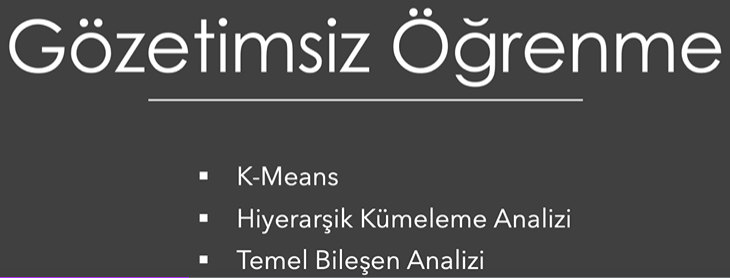


# K-Means Teorisi
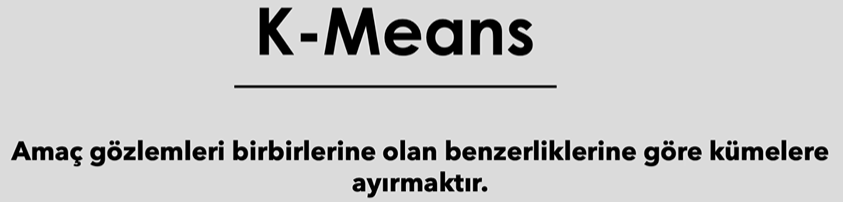

kendi içinde heterojen dışında ise homojen 

hiyerarşik olmayan bir kümeleme yöntemidir

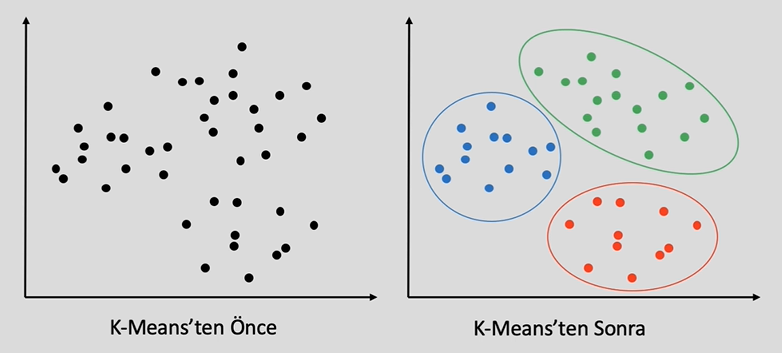

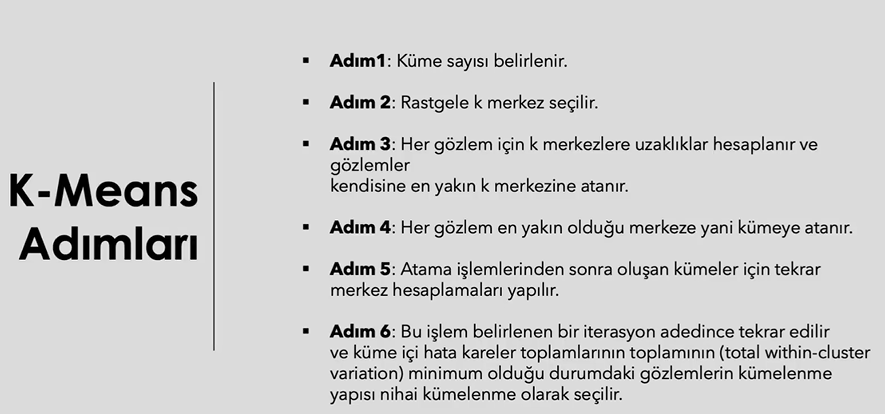

iyi bir k-means çıktısında kümeler içi yüksek kümler arası benzerlik düşük olmalıdır

başlangıç noktası seçilme problemi var,kaç basamaklı olması problemi var

uzaklık metrikleri üzerinden kümeleme işlemi gerçekleştirilmiş olucaz

# K-Means

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("USArrests.csv").copy() #amerikadaki eyelatlere göre suç oranı veren bir veri grubu 
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.idnex=df.iloc[:,0]

In [4]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df = df.iloc[:,1:5]#unamed degişkeninden kurulmaya çalıştık
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
#del df.index.name

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


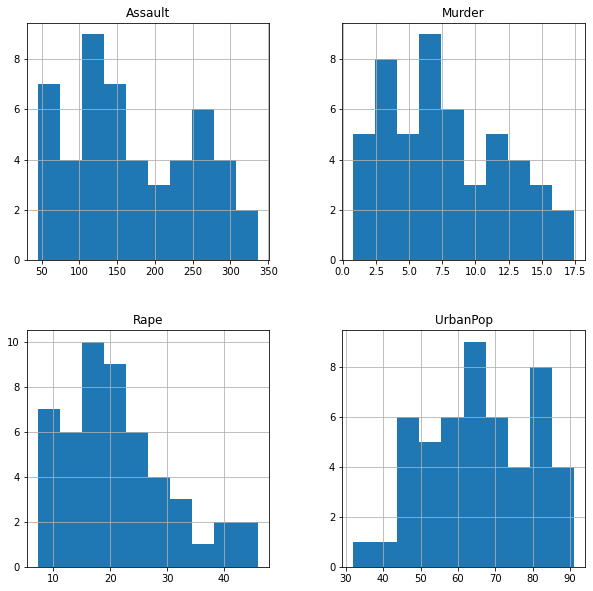

In [12]:
df.hist(figsize=(10,10));

## K-Means model ve görselleştirme

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans
#model kurma işlemi yaptık 

KMeans(n_clusters=4)

In [14]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an initialization.

n_init : int, default=10
    Num

In [15]:
k_fit = kmeans.fit(df)

In [16]:
k_fit.n_clusters

4

In [17]:
k_fit.cluster_centers_#merkeze erişme işlemi yaptık 

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [18]:
k_fit.labels_#her bir gözlemin hangi sınıf etiketine sahip oldugunu ögerenmiş olduuk

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

In [19]:
#göreselleştirme işlemi yapıcaz 

In [20]:
kmeans=KMeans(n_clusters=2)
k_fit=kmeans.fit(df)

In [21]:
kumeler=k_fit.labels_

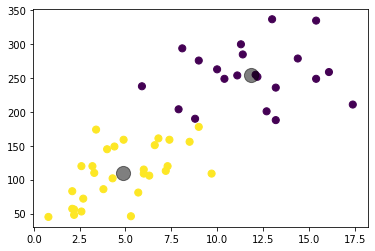

In [22]:
#iki degişkene indirdik ve sonra inceleme yaptık 

plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

#merkezleri işaretlemek istersek

merkezler=k_fit.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5);

In [23]:
!pip install --upgrade matplotlib
import mlp_toolkits

Requirement already up-to-date: matplotlib in c:\users\lenovo\anaconda3\lib\site-packages (3.5.1)


ModuleNotFoundError: No module named 'mlp_toolkits'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
kmeans=KMeans(n_clusters=3)
k_fi= kmeans.fit(df)
kumeler=k_fit.labels_
merkezler=kmeans.cluster_centers_

In [ ]:
plt.rcParams['figure.figsize']=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]);

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);
#3d görüntü elde ettik 3 degişkenli oldu 

In [ ]:
#kumeler ve gözlem birimleri

In [ ]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [ ]:
#amaç =cluster numaraları hangi eyalete ait onun bilgisini vermek 
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

In [28]:
df["kume_no"]=kumeler

In [29]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [30]:
df["kume_no"]=df["kume_no"]+1

In [31]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1


## Optimum Kume Sayısının Belirlenmesi

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


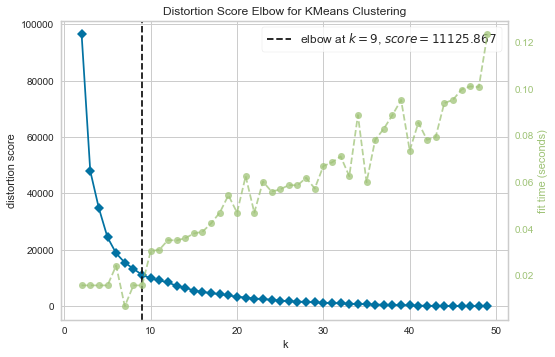

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
!pip install yellowbrick 

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()

yukarıdaki kod kısmında hata aldık bu sebeple ekran çıktısı aldık k=(2,20)iken

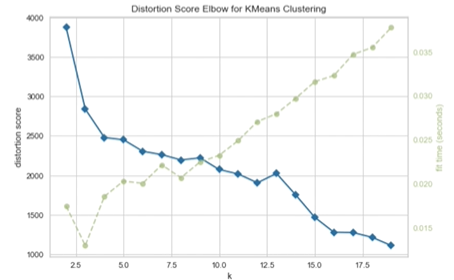

k=(2,50)iken

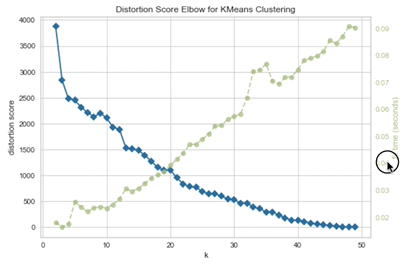

iş bilgisini göz önünde bulundurarak segmenataston yap

eger segmenatasyon odaklı yaparsak ,segment anlamını iyi düşünmek gerek


In [34]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [35]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,0,1
1,1,1
2,2,1
3,3,2
4,4,1
5,5,2
6,6,0
7,7,1
8,8,1
9,9,2


# Hiyerarşik Kümeleme Yöntemleri

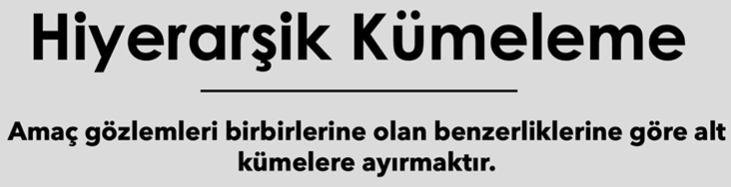

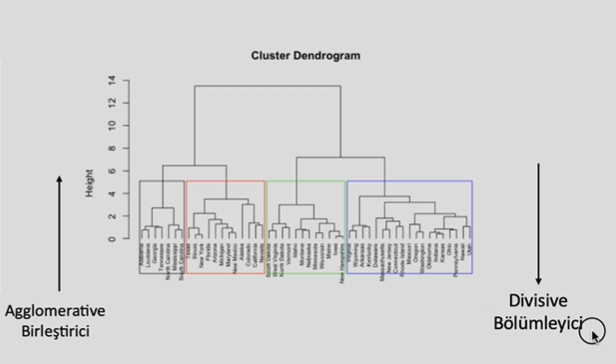

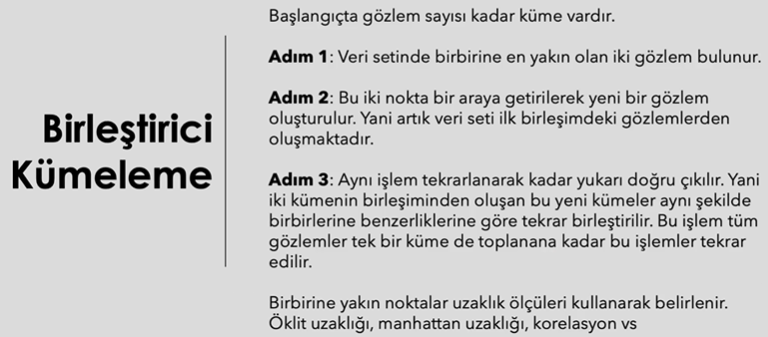

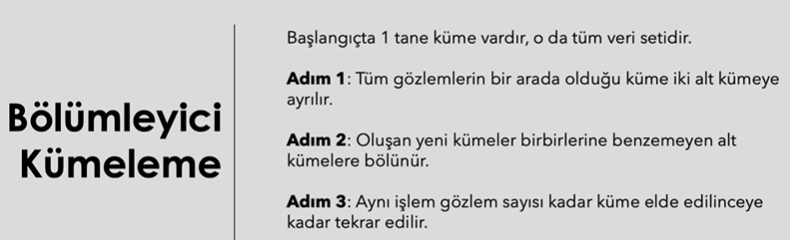

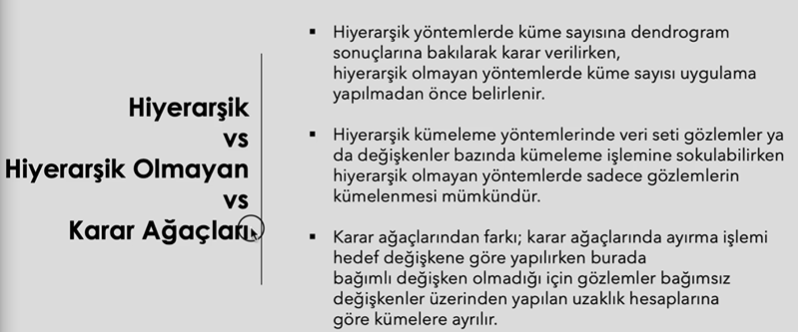

In [36]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
# del df.index.name bu kısım bende çalışmadı amacı Unnamed'i silmekti
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [37]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(df,"complete")
hc_average=linkage(df,"average")
hc_single=linkage(df,"single")

In [38]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

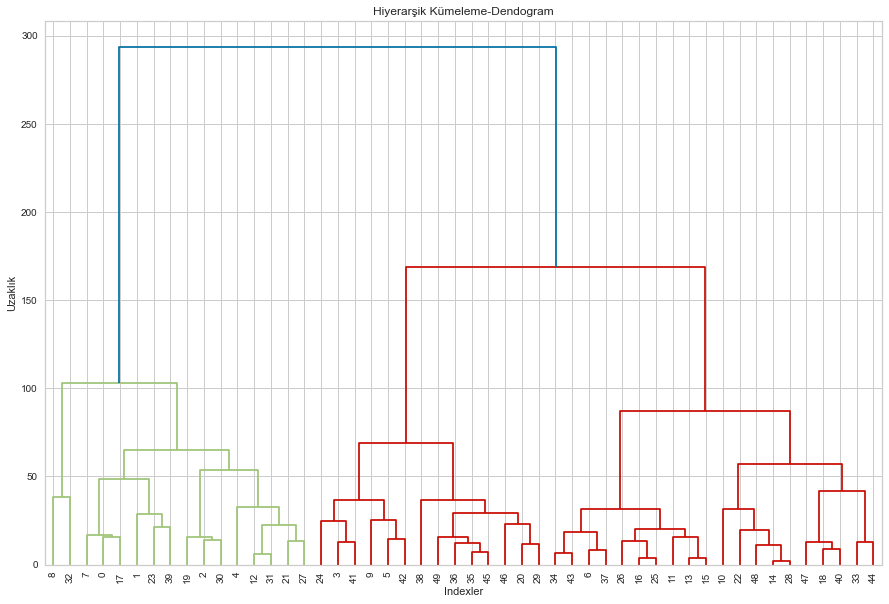

In [39]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);
# ; katmadan önce bize bazı hesaplama degerleri verir

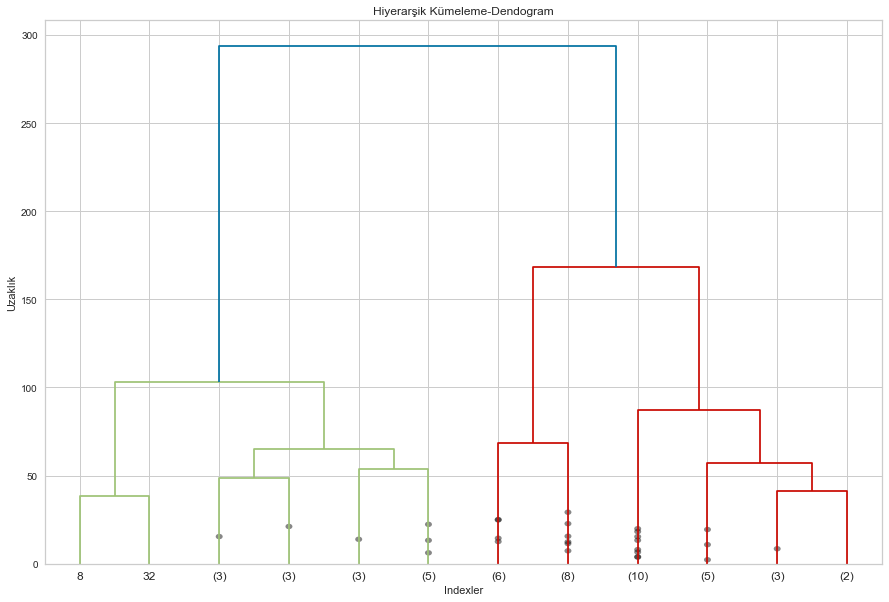

In [40]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode="lastp",
    p = 12,
    show_contracted=True
);

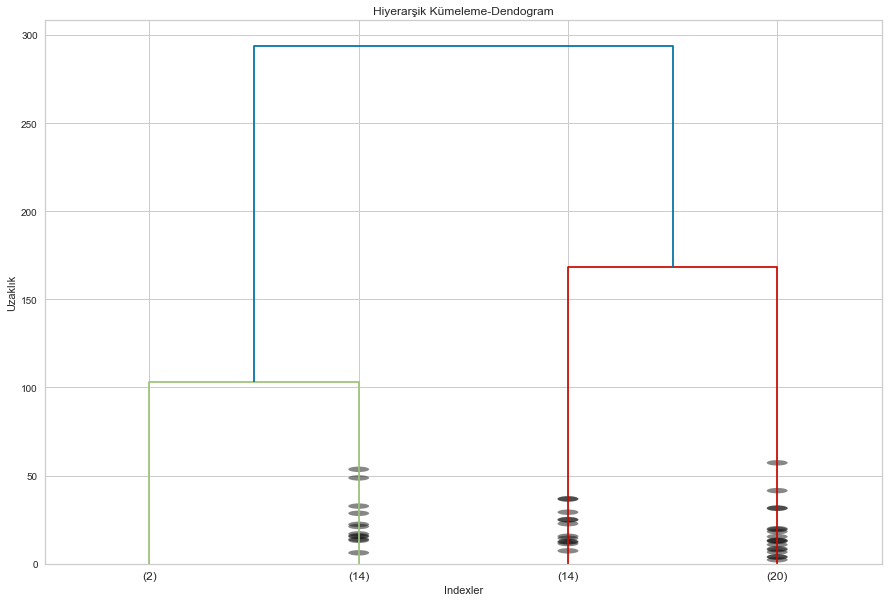

In [41]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode="lastp",
    p = 4,
    show_contracted=True
);

# Optimum Kume sayisi 

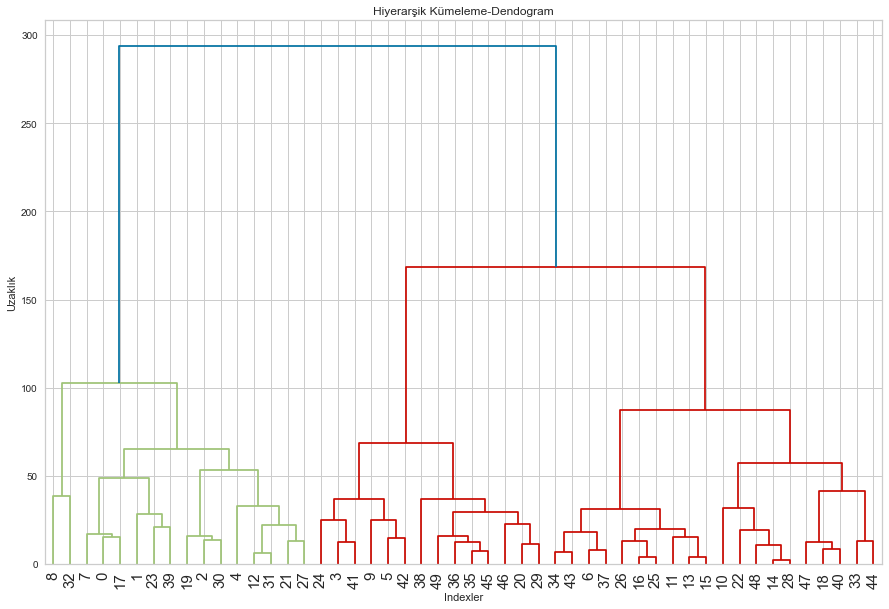

In [44]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme-Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=15
);

In [43]:
?den

Object `den` not found.


In [45]:
from sklearn.cluster import AgglomerativeClustering 
cluster=AgglomerativeClustering(n_clusters=4,
                               affinity="euclidean",
                               linkage="ward")
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [46]:
pd.DataFrame({"Eyaletler":df.index,"kumeler":cluster.fit_predict(df)})[0:10]

,Eyaletler,kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [47]:
df["kume_no"]=cluster.fit_predict(df)

In [48]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# Temel Bilesen Analizi

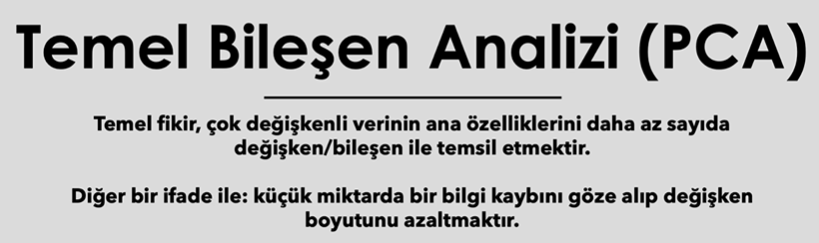

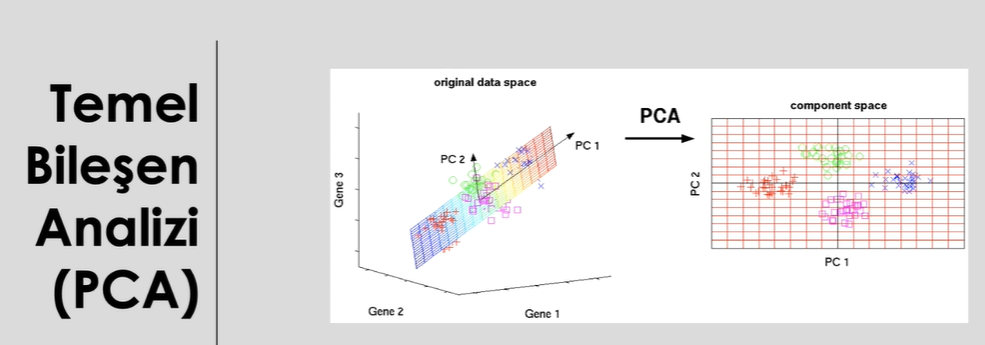

gruplar arasindaki en fazla varyansa sahip gruplar asla bilesenlerdir 


In [53]:
df=pd.read_csv("USArrests.csv").copy()
df.index=df.iloc[:,0]
df=df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [56]:
# once degiskenleri standartlastirma islemi yapmak gerekir

from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df)
df[0:5,0:5]


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [60]:
#veri setine pca uygyulayalim
from sklearn.decomposition import  PCA
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)

In [63]:
bilesen_df=pd.DataFrame(data=pca_fit,
                      columns=["birinci_bilesen","ikinci_bilesen"])

In [64]:
bilesen_df.head()#yukaridaki 4 bilesenli tabloyu 2 bilesene indirgeme islemi yaptik 


,birinci_bilesen,ikinci_bilesen
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [67]:
#gercek bilginin ne kadarini tasidigini ogrenmek istersek
pca.explained_variance_ratio_ #aciklanan varyans oranini bize verir 


array([0.62006039, 0.24744129])

In [68]:
pca=PCA().fit(df)

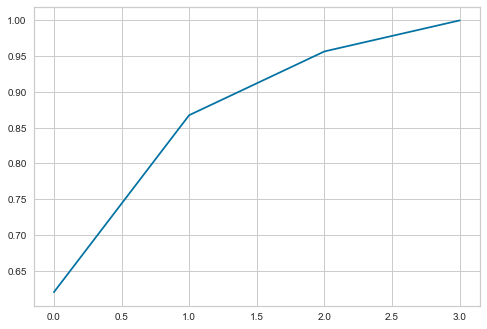

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#bilsen sayisina karar verebilmek adina bize bir cikti saglmaktadir 